In [29]:
import matplotlib.pyplot as plt
import numpy as np
# Scikit-Learn provides the popular datasets easily
from sklearn.datasets import fetch_openml

In [30]:
mnist = fetch_openml("mnist_784", version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

- "data" Key -> Contains the data
- "target" Key -> Contains the labels
- "DESCR" Key -> Contains data description

In [31]:
data = mnist["data"]
labels = mnist["target"]
data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Each row is an image with 28x28 pixels but aligned in one row

(-0.5, 27.5, 27.5, -0.5)

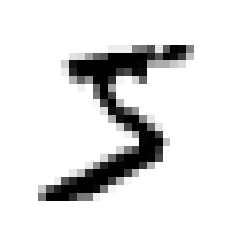

In [32]:
# to show one image
digit = data.iloc[0].values.reshape(28, 28)
plt.imshow(digit, cmap="binary")
plt.axis("off")

In [33]:
labels[0]  # Yes, the img up there is 5

'5'

In [34]:
# Casting labels to integer instead of strings.
labels = labels.astype(np.uint8)

In [35]:
train_data, train_labels = data[:60000], labels[:60000]
test_data, test_labels = data[60000:], labels[60000:]

### Starting with a binary classifier
Only differentiate 5 and not-5

In [36]:
train_labels_5 = (train_labels == 5)
test_labels_5 = (test_labels == 5)

In [37]:
# Let's start with Stochastic Gradiant Descent (SGD)
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train_data, train_labels_5)

SGDClassifier(random_state=42)

In [38]:
# Testing SGD
print(sgd_clf.predict([train_data.iloc[10]]))  # Result is False, the number is not 5
print(train_labels[10])  # This number is 3
# Hurray!

[False]
3


/Users/oabuhamdan/PycharmProjects/Hands_On_ML_Workspace/venv/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


### Performance measurement for classifier is trickier than for regressor.
### Occasionally, we will need more control over cross-validation than provided by sklearn.

In [39]:
# Cross Validation
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, train_data, train_labels_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Accuracy meter is not that good for classifiers especially for skewed data.
Confusion Matrix is much better. It will calculate how many times class A was predicted as class B.

In [40]:
from sklearn.model_selection import cross_val_predict

# cross_val_predict returns the predictions made on each test fold, while cross_val_score returns the final scores.
train_data_pred = cross_val_predict(sgd_clf, train_data, train_labels_5, cv=3)
# We will plug train_data_pred to the confusion matrix to know the accuracy of SGD classifier
train_data_pred

array([ True, False, False, ...,  True, False, False])

In [41]:
from sklearn.metrics import confusion_matrix

cm_result = confusion_matrix(train_labels_5, train_data_pred)
cm_result

array([[53892,   687],
       [ 1891,  3530]])

Confusion matrix=
[true_negatives, false_positives]
[false_negatives, true_positives]

precision = TP / (TP + FP) -> Accuracy of positive predictions
recall = TP /(TP + FN) -> Ratio of positive instances that were correctly detected

In [42]:
from sklearn.metrics import precision_score, recall_score

precision_score(train_labels_5, train_data_pred)

0.8370879772350012

In [43]:
recall_score(train_labels_5, train_data_pred)

0.6511713705958311

F1 score is a combination (harmonic mean) of precision and recall.
A harmonic mean gives much more weight to low values.
Lookup F1 score equation online.
F1 score favours similar precision and recall, which is not always the case.
<em>Precision-Recall trade-off</em>


In [44]:
from sklearn.metrics import f1_score

f1_score(train_labels_5, train_data_pred)

0.7325171197343846

SGD classifier makes its predictions based on a threshold. If the instance is above a certain threshold, it's considered positive.
To get the score that SCG gave to one instance use .decision_function()
SGD threshold is Zero.

In [45]:
sgd_clf.decision_function(train_data)

array([  2164.22030239,  -5897.37359354, -13489.14805779, ...,
         6007.43513003,   -695.89564908,  -3991.49590678])

How to decide which threshold to use?
use cross_val_predict

In [46]:
data_scores = cross_val_predict(sgd_clf, train_data, train_labels_5, cv=3, method="decision_function")
data_scores[:10]

array([  1200.93051237, -26883.79202424, -33072.03475406, -15919.5480689 ,
       -20003.53970191, -16652.87731528, -14276.86944263, -23328.13728948,
        -5172.79611432, -13873.5025381 ])

In [47]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(train_labels_5, data_scores)

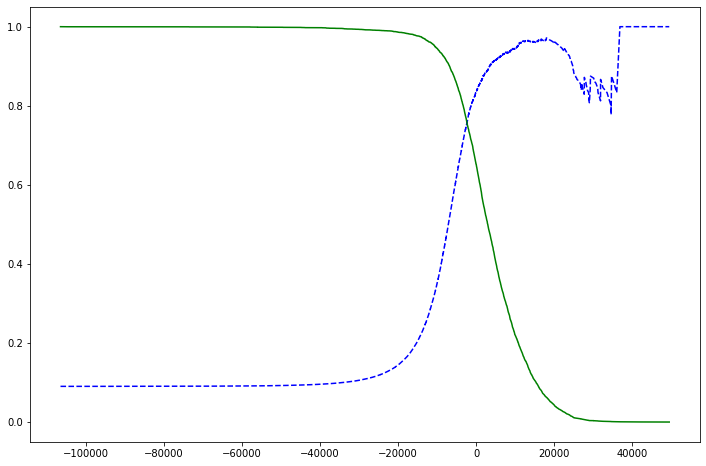

In [48]:
plt.figure(figsize=(12, 8))
plt.plot(threshold, precision[:-1], "b--", label="Precision")
plt.plot(threshold, recall[:-1], "g-", label="Recall")

In [49]:
# To use a precision of 90%
threshold_90_precision = threshold[np.argmax(precision >= .9)]  # first threshold that has 90% precision
train_label_pred_90 = (data_scores >= threshold_90_precision)  # List of True for data scores that has >= 90% precision

In [50]:
threshold_90_precision  # the threshold that gives me >=90% precision

3370.019499143958

In [51]:
precision_score(train_labels_5, train_label_pred_90)

0.9000345901072293

In [52]:
recall_score(train_labels_5, train_label_pred_90)

0.4799852425751706

If someone says "Let's reach 99% precision," you should ask, "At what recall?"

### The ROC Curve
- Receiver operating characteristic.
- Binary Classifier.
- Plots True Positive Rate (TPR)(Recall) vs False Positive Rate (FPR)
- FPR: Negative instances that were classified as positive.
- FPR = 1- TNR.
- TNR is also called specificity
- **ROC plots sensitivity (recall) vs 1-specificity**

In [53]:
from sklearn.metrics import roc_curve

fpr_sgd, tpr_sgd, thresholds = roc_curve(train_labels_5, data_scores)

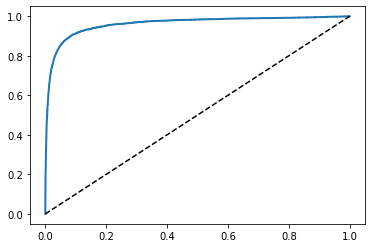

In [54]:
plt.plot(fpr_sgd, tpr_sgd, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')  # drawing a dashed diagonal

The dotted line here is random classifier
A good classifier will be skewed to the top left corner.
Larger the Area Under the Curve, better the classifier.

In [55]:
from sklearn.metrics import roc_auc_score # Area under the Curve calculation
auc = roc_auc_score(train_labels_5, data_scores)
auc

0.9604938554008616

Q: When to use PR curve over ROC?
A: PR is preferred whenever positive class is rare or when you care more about false positives

In [56]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
rfc = RandomForestClassifier(random_state=42)
rfc_probas_forest = cross_val_predict(rfc, train_data, train_labels_5, cv=3, method="predict_proba")
rfc_probas_forest[:10] #-> Class true and class false, and each instance with its probability belonging to a class
#predic_proba returns a matrix -> row per instances, column per class. each given the probe that this instance is in this class

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01]])

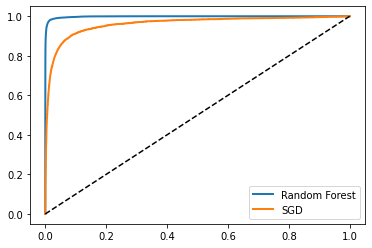

In [57]:
rfc_probas_scores = rfc_probas_forest[:, 1] # Positive column of the results
fpr_forest, tpr_forest, threshold_forest = roc_curve(train_labels_5, rfc_probas_scores)  # ROC curve can take scores or probabilities
plt.plot(fpr_forest, tpr_forest, linewidth=2, label="Random Forest")
plt.plot(fpr_sgd, tpr_sgd, linewidth=2, label="SGD")
plt.plot([0, 1], [0, 1], 'k--')
plt.legend()

In [58]:
roc_auc_score(train_labels_5, rfc_probas_scores)

0.9983436731328145

In [59]:
#Let's calculate precision, recall, and F1
from sklearn.metrics import recall_score, precision_score, f1_score
rfc_predictions = (rfc_probas_scores >=.5)
rfc_recall = recall_score(train_labels_5, rfc_predictions)
rfc_precision = precision_score(train_labels_5, rfc_predictions)
rfc_f1 = f1_score(train_labels_5, rfc_predictions)
print(rfc_precision, rfc_recall, rfc_f1)

0.9897468089558485 0.8725327430363402 0.9274509803921569


# Multiclass Classification
- One versus the Rest (OvR) strategy is used to classify multiple classes using binary classifiers. It uses each classifier with the instance to check
if it belongs to this class or not. Then, it classifies the instance to the one that outputs the highest score. (10 classifiers to classify between 10 classes)
- One versus One (OvO) strategy is used also to classify multiple classes using binary classifiers.
It uses a classifier to classify an instance between only two classes and repeat that for each available class. (45 classifiers to classify between 10 classes)

We use the second strategy because it's faster to train multiple classifiers on small training sets than few classifiers on large training sets.
For most binary classifiers, OvR is preferred

#### Scikit-Learn detects when you try to apply binary classifier (SVM for instance)  for multiple classes, and it automatically runs OvR or OvO depending on the algorithm.

In [60]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(train_data, train_labels)
# it used OvO strategy

SVC()

In [61]:
i = 4
prediction = svm_clf.predict([data.iloc[i]])
label = train_labels[i]
print(f"Label {label}, Prediction {prediction}")

Label 9, Prediction [9]


/Users/oabuhamdan/PycharmProjects/Hands_On_ML_Workspace/venv/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [62]:
# Let's check the scores for each class
svm_clf.decision_function([data.iloc[i]])

/Users/oabuhamdan/PycharmProjects/Hands_On_ML_Workspace/venv/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[-0.3072346 ,  2.72940761,  2.72002558,  4.87604398,  8.30262765,
         2.7690617 ,  0.697264  ,  7.26676236,  6.27772212,  9.31277815]])

#### Note:
You should check how the classifier arranged the classes using classes_ attribute.

In [63]:
svm_clf.classes_
# Here you are lucky that the classes ordered as the real numbers

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [64]:
# To force sklearn to use OvO or OvR use the following
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
# ovr_clf.fit(train_data, train_labels) takes long time

In [65]:
i = 4
prediction = ovr_clf.predict([data.iloc[i]])
label = train_labels[i]
print(f"Label {label}, Prediction {prediction}")

NotFittedError: This OneVsRestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# We can use SGD classifier with multiple classes without using OvR or OvO
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
sgd_clf = SGDClassifier(random_state=42)
cross_val_score(sgd_clf, train_data, train_labels, cv=3, scoring="accuracy")

In [ ]:
# Using standard scalar enhances the results
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_train_data = scalar.fit_transform(train_data.astype(np.float64))
cross_val_score(sgd_clf, scaled_train_data, train_labels, cv=3, scoring="accuracy")

### Error Analysis

In [ ]:
from sklearn.metrics import confusion_matrix
train_data_pred = cross_val_predict(sgd_clf, scaled_train_data, train_labels, cv=3)
conf_mx = confusion_matrix(train_labels, train_data_pred)
conf_mx

In [ ]:
# Plotting values in gray
plt.matshow(conf_mx, cmap=plt.cm.gray)

You can notice from the plot that most of the values were predicted in a good way. Let's check how many were mis-predicted

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
conf_mx_norm = conf_mx / row_sums # dividing each column (classified to that class) over the row sum (total instances of that class) to check the errors per each instance
# Remember that in conf matrix the row is the actual classes while the column is the predicted classes

In [ ]:
# plotting the conf mx norm
np.fill_diagonal(conf_mx_norm, 0)
plt.matshow(conf_mx_norm, cmap=plt.cm.gray)

You can notice that 8 is the highest class that got mis-predicted.
It seems that more effort should be put to decrease falsy 8s.

# Multilabel Classification
It's the case where in one instance you have multiple classes (Let's say two faces in one picture).

In [70]:
multiple_of_2_labels = (train_labels % 2 == 1)
greater_than_5_labels =  (train_labels >= 5)
multilabel = np.c_[multiple_of_2_labels, greater_than_5_labels]
# We will use K Nearest Neighbor classifier since it can handle multi-labels
multilabel[:10]

array([[ True,  True],
       [False, False],
       [False, False],
       [ True, False],
       [ True,  True],
       [False, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [False, False]])

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(train_data, multilabel)

KNeighborsClassifier()

In [79]:
i = 12
prediction = knn_clf.predict([data.iloc[i]])
label = train_labels[i]
print(f"Label {label}, Prediction {prediction}")

Label 3, Prediction [[ True False]]


/Users/oabuhamdan/PycharmProjects/Hands_On_ML_Workspace/venv/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### To Evaluate multilabel classifier
Measure F1 score for each label, then take average of F1 scores

In [80]:
# Example of evaluating Multilabel classifier
knn_pred = cross_val_predict(knn_clf, train_data, multilabel, cv=3)
f1_score(multilabel, knn_pred, average="macro") # All labels have the same importance.
# We can use "weighted" instead of "macro" to give each class an importance based on its popularity

0.9817475061789299

# Multi-output Classification
It's multilabel with multiclass. I.e. Each label can be multiclass.
A simple example in the book is to clean an image with KNN classifier. Pages 107 + 108.